# XAI Implementation with SHAP
##### Reference to all related LR, and senior progress report 
##### 👉 https://grove-wish-6a4.notion.site/Literature-Review-for-XAI-Abdulla-16a044f5ae6480eaabf8ef223735ff37?pvs=4
---

##### Necessary Imports for the entire program

In [27]:
# - Data Manipulation and Preprocessing
import pandas as pd         # For handling datasets and data manipulation
import numpy as np          # For manipulating numeric values

# - Model Building

# For splitting data 
from sklearn.model_selection import train_test_split 

from sklearn.metrics import (
    accuracy_score         # For evaluating model accuracy
)

# - Machine Learning Models
from sklearn.ensemble import RandomForestClassifier  # For Random Forest Classifier


# - Visualization
import plotly.express as px                          # For simple, expressive plotting
import matplotlib.pyplot as plt                      # For plotting static visualizations


# - XAI Implementation
import shap                                          # For Implementing SHAP

##### <u>**Loading and viewing the dataset**</u> 

In [28]:
data = pd.read_csv("selected_genes_500_xg.csv")

data

,FNTA,RPL13A,PRKAB2,LMAN1,PLEKHH3,FOXG1,LENEP,PLEKHM1,ZNF331,WASL,...,LEPR,VIPR1,ABCG5,CTBS,PDGFRA,CHST4,ATP5D,DNAJB14,BMP5,Symbol
0,11.297200,14.966000,9.498130,11.731300,8.305770,1.792970,0.896011,8.758000,8.418010,10.680500,...,12.408900,8.841790,12.072300,9.920940,7.784400,7.641680,12.830600,9.134580,7.305270,sl
1,10.824800,15.117000,9.571150,12.398000,8.823390,1.098990,0.893618,10.087700,8.781200,10.650500,...,12.392500,9.896900,10.825600,9.973580,11.152900,9.628030,13.010900,9.605040,6.587220,sl
2,10.847800,15.094800,9.205950,12.905100,9.021860,1.319160,1.255240,9.610530,8.872160,10.418000,...,13.242800,9.736940,11.017900,10.080300,10.780300,9.974950,13.633200,9.173220,6.502350,sl
3,11.285000,14.872900,9.351100,12.919500,8.443840,1.100720,0.894844,10.030300,8.592660,10.404600,...,11.796800,8.841690,11.536800,10.152500,10.192600,8.131270,13.023700,9.565130,6.501770,sl
4,10.645000,15.358600,9.070840,12.444800,9.259130,1.100160,0.894447,9.695740,9.565850,10.493300,...,11.735800,9.612080,11.527200,9.530410,9.555440,7.438170,13.925600,8.122950,5.065310,sl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,10.030643,10.583749,8.462638,6.637312,7.195148,5.885801,5.706954,7.158889,7.005923,10.334260,...,10.352682,10.481065,8.078393,9.370270,9.867904,10.228107,11.749861,7.901930,7.006292,sl
766,9.308484,9.460258,8.212136,6.179422,7.275672,5.641487,5.902423,7.327063,7.062386,9.907153,...,8.157884,10.154319,8.856472,9.719864,7.500607,6.190256,12.398339,8.159077,5.920143,ehcc
767,9.780593,10.147125,9.188711,6.602732,7.006846,6.031874,5.711407,7.464194,6.388256,10.064824,...,9.898550,8.987347,9.684653,9.120302,6.932221,6.122836,11.882567,8.048209,6.116673,ehcc
768,9.818722,9.747493,8.596682,6.701066,7.712645,5.956010,5.893906,7.203791,7.014167,10.614054,...,8.782304,9.409681,8.287098,9.899270,7.671989,6.321199,11.999193,7.937260,6.201666,ehcc


##### <u>**Removal of duplicates**</u>

In [29]:
duplicates = data.duplicated()
print("Duplicate rows present in our liver cancer dataset:")
print(data[duplicates])

data = data.drop_duplicates()

print("Our dataframe object after removing duplicates:")
print(data)

Duplicate rows present in our liver cancer dataset:
Empty DataFrame
Columns: [FNTA, RPL13A, PRKAB2, LMAN1, PLEKHH3, FOXG1, LENEP, PLEKHM1, ZNF331, WASL, PALM, MMRN2, UPF3B, HK1, CADPS, KLRB1, ARMCX4, IGF2BP3, TMEM158, EXOC3, TJP2, MICA, HNRNPAB, CRADD, CCR1, ABCD1, OLFML1, OTUD3, PRKAR1B, AQP6, FLCN, YBX2, NTSR2, ABCC3, EPYC, WDR43, TBX5, TIMM10, DLEC1, RIN3, ACTL6A, NOL8, MCFD2, RNASET2, PRPF4B, PTPRM, CASR, RANBP2, ABCD4, SMARCD2, PPP2R5C, RAD54L, GABARAPL2, IRF9, FNBP1, SLC1A1, SYNGR3, ZBTB43, AOAH, ATP6V0D1, MAL, CYP4F3, MPP1, SCNN1D, ZNF385D, ZXDA, ZNF362, ZNF415, TEX2, GALNT4, CACNA1A, PODXL2, MYC, WDR91, TNFSF12, CRKL, MAP2K7, TUBB3, NDUFB4, ZBTB39, MARCKS, USP48, KLHDC8A, ARTN, LMAN1L, TM6SF1, ANKHD1-EIF4EBP3, LRRC31, ARPC5, PA2G4, TOP3B, MBD4, FAM49A, STC1, SLC22A4, TOM1L1, KNTC1, POMZP3, MEP1A, PDCD6IP, ...]
Index: []

[0 rows x 501 columns]
Our dataframe object after removing duplicates:
          FNTA     RPL13A    PRKAB2      LMAN1   PLEKHH3     FOXG1     LENEP  \
0    11.

#### We can notice that there were no duplicate rows amongst our dataset

##### Let's observe a general description of the data

In [30]:
data.describe()

,FNTA,RPL13A,PRKAB2,LMAN1,PLEKHH3,FOXG1,LENEP,PLEKHM1,ZNF331,WASL,...,TSPAN7,LEPR,VIPR1,ABCG5,CTBS,PDGFRA,CHST4,ATP5D,DNAJB14,BMP5
count,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,...,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000,770.000000
mean,9.830529,11.386738,6.632759,6.650699,4.147177,3.502188,4.729801,5.931961,7.461844,8.076463,...,6.821512,6.564034,6.478701,8.914742,7.516251,7.166102,5.708625,8.084441,7.666284,3.623757
std,0.849492,1.070341,1.372231,1.707957,1.543616,1.449236,0.994949,0.988004,1.535125,1.574285,...,1.096398,2.285055,1.391966,1.871927,1.293298,2.540508,1.861424,1.741504,0.977664,1.439751
min,6.503775,8.458377,2.820605,2.475998,2.086013,1.092670,0.889150,4.041178,3.260362,3.738651,...,3.195900,2.346697,2.880102,2.854717,4.006609,2.116066,2.802143,5.835703,4.043386,1.567429
25%,9.304760,10.741000,5.714509,5.792298,3.299575,2.824644,4.325317,5.394093,6.392302,7.150717,...,6.082886,4.926110,5.690263,8.153266,6.780238,4.828880,4.428785,7.096043,7.271608,2.632070
50%,9.853110,11.418217,6.483085,6.640908,3.642899,3.081715,4.894539,5.605948,7.510724,8.088382,...,6.847724,6.179373,6.203456,9.251357,7.623716,7.377411,5.000871,7.606091,7.823369,2.969673
75%,10.318969,11.918522,7.401941,7.378960,4.228279,3.928156,5.342103,6.027815,8.507082,9.109302,...,7.611388,7.996107,6.962566,10.076888,8.318910,8.914388,6.844163,8.041807,8.181409,4.566655
max,12.360497,15.541100,11.198500,13.248300,10.846400,10.713577,6.866125,10.223200,11.552221,11.618500,...,10.037737,13.530900,11.280150,13.029400,10.959600,12.315176,12.168509,14.277900,10.441366,7.339790


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 770 entries, 0 to 769
Columns: 501 entries, FNTA to Symbol
dtypes: float64(500), object(1)
memory usage: 2.9+ MB


##### <u>**Checking null values using `isnull()` function**</u>

In [32]:
data.isnull().sum()

FNTA       0
RPL13A     0
PRKAB2     0
LMAN1      0
PLEKHH3    0
          ..
CHST4      0
ATP5D      0
DNAJB14    0
BMP5       0
Symbol     0
Length: 501, dtype: int64

##### **Filtering of null values using `fillna()` function**

```python
df.fillna(0, inplace=True) # For replacing NaN values with 0

In [33]:
data.fillna(0, inplace=True)

# Check for any null values still exists in the dataset
null_counts = data.isnull().sum()
print(null_counts[null_counts > 0])

Series([], dtype: int64)


##### No null values, we get an empty array.

##### <u>**Re-encoding Labels for Classification**</u>

##### (From the senior group)

In [34]:
target = data["Symbol"].map({
    "sl": 0,
    "hgdn": 1,
    "lgdn": 2, 
    "ehcc": 3, 
    "phcc": 4
})

##### **Note that we didn't keep the old Category labels in order to avoid redundancy**

#### <u> **Encoded Labels Mapping** </u>
- **`sl`** → `0`
- **`hgdn`** → `1`
- **`lgdn`** → `2`
- **`ehcc`** → `3`
- **`phcc`** → `4`

This is to showcase the order of mapping that was done after the encoding process


### <u> **Univariant Analysis** </u>

In [35]:
data.Symbol.value_counts()

phcc    331
ehcc    305
lgdn     70
hgdn     38
sl       26
Name: Symbol, dtype: int64

In [36]:
# Get unique values and counts for the bar chart
values = data['Symbol'].unique()
count = data['Symbol'].value_counts().to_list()


fig = px.bar( # bar-chart
    x=values,
    y=count,
    title='Values by Classes',
    labels={"x": "Class", "y": "Number of Cases"} 
)

fig.show()

#### **Preprocessing is complete, below is the preview of the new dataset acheived:**

[Note: we were asked to not implement any standardization as this can possibly hurt the medical nature of our dataset]

In [37]:
data

,FNTA,RPL13A,PRKAB2,LMAN1,PLEKHH3,FOXG1,LENEP,PLEKHM1,ZNF331,WASL,...,LEPR,VIPR1,ABCG5,CTBS,PDGFRA,CHST4,ATP5D,DNAJB14,BMP5,Symbol
0,11.297200,14.966000,9.498130,11.731300,8.305770,1.792970,0.896011,8.758000,8.418010,10.680500,...,12.408900,8.841790,12.072300,9.920940,7.784400,7.641680,12.830600,9.134580,7.305270,sl
1,10.824800,15.117000,9.571150,12.398000,8.823390,1.098990,0.893618,10.087700,8.781200,10.650500,...,12.392500,9.896900,10.825600,9.973580,11.152900,9.628030,13.010900,9.605040,6.587220,sl
2,10.847800,15.094800,9.205950,12.905100,9.021860,1.319160,1.255240,9.610530,8.872160,10.418000,...,13.242800,9.736940,11.017900,10.080300,10.780300,9.974950,13.633200,9.173220,6.502350,sl
3,11.285000,14.872900,9.351100,12.919500,8.443840,1.100720,0.894844,10.030300,8.592660,10.404600,...,11.796800,8.841690,11.536800,10.152500,10.192600,8.131270,13.023700,9.565130,6.501770,sl
4,10.645000,15.358600,9.070840,12.444800,9.259130,1.100160,0.894447,9.695740,9.565850,10.493300,...,11.735800,9.612080,11.527200,9.530410,9.555440,7.438170,13.925600,8.122950,5.065310,sl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,10.030643,10.583749,8.462638,6.637312,7.195148,5.885801,5.706954,7.158889,7.005923,10.334260,...,10.352682,10.481065,8.078393,9.370270,9.867904,10.228107,11.749861,7.901930,7.006292,sl
766,9.308484,9.460258,8.212136,6.179422,7.275672,5.641487,5.902423,7.327063,7.062386,9.907153,...,8.157884,10.154319,8.856472,9.719864,7.500607,6.190256,12.398339,8.159077,5.920143,ehcc
767,9.780593,10.147125,9.188711,6.602732,7.006846,6.031874,5.711407,7.464194,6.388256,10.064824,...,9.898550,8.987347,9.684653,9.120302,6.932221,6.122836,11.882567,8.048209,6.116673,ehcc
768,9.818722,9.747493,8.596682,6.701066,7.712645,5.956010,5.893906,7.203791,7.014167,10.614054,...,8.782304,9.409681,8.287098,9.899270,7.671989,6.321199,11.999193,7.937260,6.201666,ehcc


### <u>**Splitting Features and Targets**</u>

In [38]:
data_predictors = data.drop(columns=["Symbol"])
predictor_names = data_predictors.columns

data_predictors

,FNTA,RPL13A,PRKAB2,LMAN1,PLEKHH3,FOXG1,LENEP,PLEKHM1,ZNF331,WASL,...,TSPAN7,LEPR,VIPR1,ABCG5,CTBS,PDGFRA,CHST4,ATP5D,DNAJB14,BMP5
0,11.297200,14.966000,9.498130,11.731300,8.305770,1.792970,0.896011,8.758000,8.418010,10.680500,...,6.835670,12.408900,8.841790,12.072300,9.920940,7.784400,7.641680,12.830600,9.134580,7.305270
1,10.824800,15.117000,9.571150,12.398000,8.823390,1.098990,0.893618,10.087700,8.781200,10.650500,...,8.151800,12.392500,9.896900,10.825600,9.973580,11.152900,9.628030,13.010900,9.605040,6.587220
2,10.847800,15.094800,9.205950,12.905100,9.021860,1.319160,1.255240,9.610530,8.872160,10.418000,...,8.036000,13.242800,9.736940,11.017900,10.080300,10.780300,9.974950,13.633200,9.173220,6.502350
3,11.285000,14.872900,9.351100,12.919500,8.443840,1.100720,0.894844,10.030300,8.592660,10.404600,...,7.325690,11.796800,8.841690,11.536800,10.152500,10.192600,8.131270,13.023700,9.565130,6.501770
4,10.645000,15.358600,9.070840,12.444800,9.259130,1.100160,0.894447,9.695740,9.565850,10.493300,...,8.351560,11.735800,9.612080,11.527200,9.530410,9.555440,7.438170,13.925600,8.122950,5.065310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765,10.030643,10.583749,8.462638,6.637312,7.195148,5.885801,5.706954,7.158889,7.005923,10.334260,...,7.900075,10.352682,10.481065,8.078393,9.370270,9.867904,10.228107,11.749861,7.901930,7.006292
766,9.308484,9.460258,8.212136,6.179422,7.275672,5.641487,5.902423,7.327063,7.062386,9.907153,...,8.039006,8.157884,10.154319,8.856472,9.719864,7.500607,6.190256,12.398339,8.159077,5.920143
767,9.780593,10.147125,9.188711,6.602732,7.006846,6.031874,5.711407,7.464194,6.388256,10.064824,...,8.097711,9.898550,8.987347,9.684653,9.120302,6.932221,6.122836,11.882567,8.048209,6.116673
768,9.818722,9.747493,8.596682,6.701066,7.712645,5.956010,5.893906,7.203791,7.014167,10.614054,...,8.319582,8.782304,9.409681,8.287098,9.899270,7.671989,6.321199,11.999193,7.937260,6.201666


In [39]:
predictor_names

Index(['FNTA', 'RPL13A', 'PRKAB2', 'LMAN1', 'PLEKHH3', 'FOXG1', 'LENEP',
       'PLEKHM1', 'ZNF331', 'WASL',
       ...
       'TSPAN7', 'LEPR', 'VIPR1', 'ABCG5', 'CTBS', 'PDGFRA', 'CHST4', 'ATP5D',
       'DNAJB14', 'BMP5'],
      dtype='object', length=500)

##### **Split the dataset into 70% training data and 30% testing data.**

In [40]:
x_train, x_test, y_train, y_test = train_test_split(data_predictors, target, test_size=0.3, random_state=0)

### <u>**Optimized `RandomForestClassifier` with `PSO` Optimization From The Senior Group**</u>
#### The model is non-deterministic, so output changes with each run.

In [41]:
# Train model function
def train_model(x_train, x_test, y_train, y_test, feature_names):
    x_train = x_train[feature_names]
    x_test = x_test[feature_names]
    
    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train, y_train)
    y_hat = mdl.predict(x_test)
    accuracy = accuracy_score(y_test, y_hat)
    return accuracy

# Feature selection fitness
def feature_selection_fitness(features):
    features = [int(x) for x in features]
    selected_features = [i for i, x in enumerate(features) if x == 1]
    
    if not selected_features:  # Avoid empty feature set
        return 0
    
    feature_names = predictor_names[selected_features]
    accuracy = train_model(x_train, x_test, y_train, y_test, feature_names)
    return -accuracy  # PSO minimizes the fitness function

# PSO parameters
num_features = data_predictors.shape[1]
swarm_size = 10
max_iter = 10
inertia = 0.72984
c1 = 2.05
c2 = 2.05
lb = np.zeros(num_features)
ub = np.ones(num_features)

# Initialize particles
particles = np.random.randint(2, size=(swarm_size, num_features))  # Binary initialization
velocities = np.random.uniform(size=(swarm_size, num_features))
pbest_positions = particles.copy()
pbest_scores = np.array([feature_selection_fitness(p) for p in particles])
gbest_position = pbest_positions[pbest_scores.argmin()]
gbest_score = pbest_scores.min()

# PSO algorithm
for iteration in range(max_iter):
    r1 = np.random.uniform(size=(swarm_size, num_features))
    r2 = np.random.uniform(size=(swarm_size, num_features))
    velocities = (inertia * velocities + 
                  c1 * r1 * (pbest_positions - particles) + 
                  c2 * r2 * (gbest_position - particles))
    particles = particles + velocities
    particles = np.clip(particles, lb, ub).astype(int)  # Convert to binary

    # Evaluate fitness
    scores = np.array([feature_selection_fitness(p) for p in particles])

    # Update personal bests
    better_idx = scores < pbest_scores
    pbest_positions[better_idx] = particles[better_idx]
    pbest_scores[better_idx] = scores[better_idx]

    # Update global best
    if scores.min() < gbest_score:
        gbest_position = particles[scores.argmin()]
        gbest_score = scores.min()

    print(f"Iteration {iteration+1}/{max_iter}, Best Score: {-gbest_score:.4f}")

best_features = np.where(gbest_position == 1)[0]

# Select top features
def select_top_features(x_train, x_test, y_train, y_test, feature_names):
    x_train_subset = x_train[feature_names]
    x_test_subset = x_test[feature_names]

    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train_subset, y_train)

    importances = mdl.feature_importances_
    feature_importances = dict(zip(feature_names, importances))

    top_features = sorted(feature_importances, key=feature_importances.get, reverse=True)[:15]
    return top_features

selected_feature_names = predictor_names[best_features]
top_features = select_top_features(x_train, x_test, y_train, y_test, selected_feature_names)

# Print the results
print("Top 5 features:")
for i, feature in enumerate(top_features, start=1):
    print(f"{i}. {feature}")

# Train and evaluate the model with the top 5 features
def evaluate_best_features(x_train, x_test, y_train, y_test, top_features):
    x_train_best = x_train.loc[:, top_features]
    x_test_best = x_test.loc[:, top_features]

    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train_best, y_train)
    y_hat = mdl.predict(x_test_best)

    accuracy = accuracy_score(y_test, y_hat)
    return accuracy

best_accuracy = evaluate_best_features(x_train, x_test, y_train, y_test, top_features)



print(f"Accuracy with the top 5 feature subset: {best_accuracy:.4f}")

Iteration 1/10, Best Score: 0.9481
Iteration 2/10, Best Score: 0.9481
Iteration 3/10, Best Score: 0.9481
Iteration 4/10, Best Score: 0.9481
Iteration 5/10, Best Score: 0.9481
Iteration 6/10, Best Score: 0.9481
Iteration 7/10, Best Score: 0.9481
Iteration 8/10, Best Score: 0.9481
Iteration 9/10, Best Score: 0.9481
Iteration 10/10, Best Score: 0.9481
Top 5 features:
1. DNAJB14
2. FGF23
3. ZBTB43
4. BMP5
5. ANKRD36
6. SMARCD2
7. WT1
8. CAMK2G
9. PPID
10. IGLL1
11. RHOT2
12. PTTG1
13. EP300
14. IL1RL1
15. ZNF148
Accuracy with the top 5 feature subset: 0.9264


#### **A different version of the last function is needed in order to use to save the final model into a variable as follows:**

In [42]:
def saveModel(x_train, x_test, y_train, y_test, top_features):
    x_train_best = x_train.loc[:, top_features]
    x_test_best = x_test.loc[:, top_features]

    mdl = RandomForestClassifier(random_state=1)
    mdl.fit(x_train_best, y_train)
    y_hat = mdl.predict(x_test_best)

    accuracy = accuracy_score(y_test, y_hat)
    return mdl, accuracy, x_train_best, x_test_best  # now returns all needed components and we can save the final model.

#### **Save the final model in the `final_model` variable**

In [43]:
#! Save final model and data
final_model, best_accuracy, X_final, X_test_final = saveModel(
    x_train, x_test, y_train, y_test, top_features
)

### <u>**Implementation of SHAP**</u>

##### **Shapley Value Equation:**
$$\Phi_i = \sum_{T \subseteq K \setminus \{i\}} \frac{|T|!(Q - |T| - 1)!}{Q!} [F_X(T \cup \{i\}) - F_X(T)]$$

##### **It’s important to note that primary effect influencing the prediction outcome is the disparity between the Shapely values and the sum of SHAP interaction values for a given feature**
$$\Phi_{i,j} = \Phi_i - \sum_{j \neq i} \Phi_{i,j}$$

Note that:
* $T$: Subset of features excluding the $i^{th}$ feature
* $Q$: Total number of features
* $|T|$: Size of the subset $T$
* $F_X(T)$: Prediction function based on the subset $T$
* $F_X(T \cup \{i\})$: Prediction function for the subset $T$ combined with the $i^{th}$ feature
* $|T|!$: Accounts for all possible permutations of features in subset $T$ before the $i^{th}$ feature
* $(Q - |T| - 1)!$: Represents the permutations of the features after the $i^{th}$ feature
* $Q!$: Total permutations of all features
* Marginal Contribution $F_X(T \cup \{i\}) - F_X(T)$: The difference in prediction when the $i^{th}$ feature is added to the subset $T$, quantifying its contribution

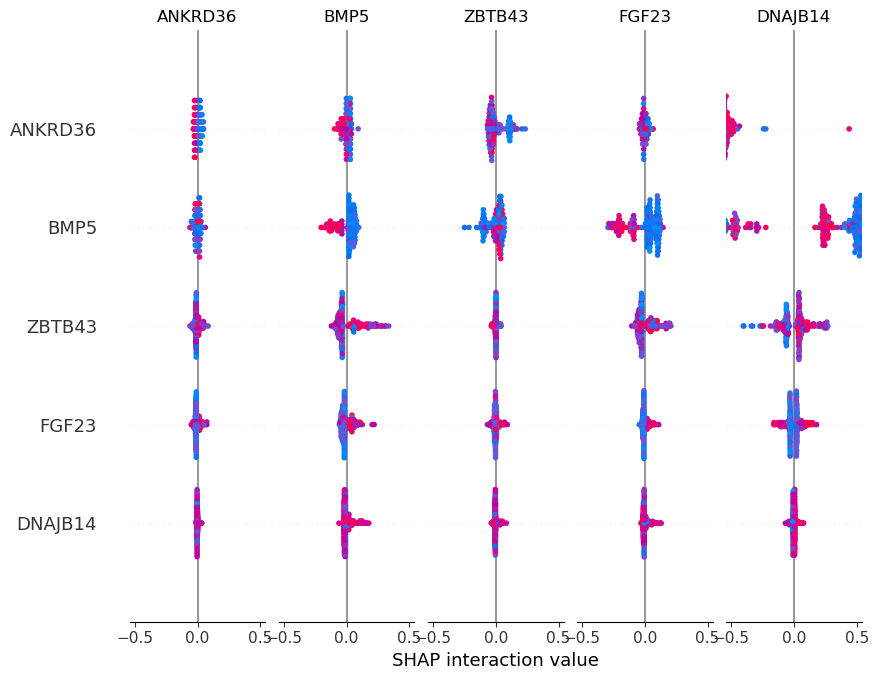

In [44]:
explainer = shap.TreeExplainer(final_model)
shap_values = explainer.shap_values(X_test_final)
shap.summary_plot(shap_values, X_test_final)

In [45]:
def shap_values_to_list(shap_values, model):
    shap_as_list=[]
    for i in range(len(model.classes_)):
        shap_as_list.append(shap_values[:,:,i])
    return shap_as_list

In [46]:
class_names = ("sl", "hgdn", "lgdn", "ehcc", "phcc")

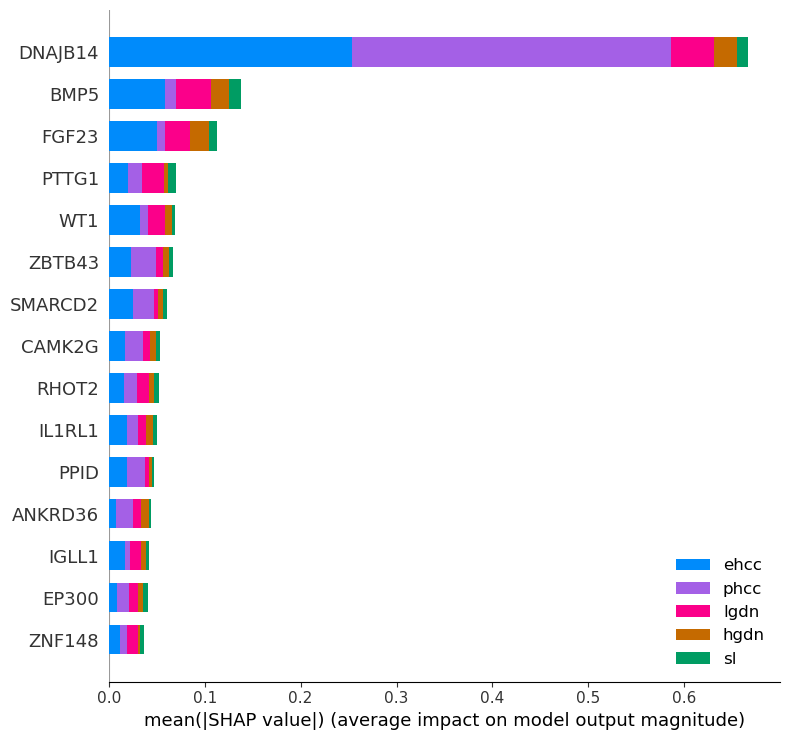

In [47]:
shap_as_list = shap_values_to_list(shap_values, final_model)
shap.summary_plot(shap_as_list, X_test_final, class_names=class_names)

##### <u> **Variable Importance Plot** </u>
##### - Highlights the most and least influential features in the model.
##### - SHAP values quantify the impact of each feature by showing how the prediction changes when a feature assumes specific values.


In [48]:
# Verify shapes
print(f"Data shape: {X_test_final.shape}")
shap_values.shape

Data shape: (231, 15)


(231, 15, 5)

#### The shapes should be equal for the experiments to work.

#### **Calculate the mean absolute SHAP values then sort them depending on shap values and importances for proper graphing**

In [49]:
# Calculate mean absolute SHAP values
mean_shap = np.abs(np.array(shap_values)).mean(axis=1)  # Shape: (number of classes, number of features)
print(f"Mean SHAP shape: {mean_shap.shape}")

# Sort features by total importance
total_importance = mean_shap.sum(axis=0)  
sorted_idx = np.argsort(total_importance)[::-1]  
sorted_features = X_test_final.columns[sorted_idx]  

Mean SHAP shape: (231, 5)


#### **Dynamically allocate each label and a color for the graph, to ensure we copy each class data correctly**

In [50]:
# Dynamically extract class mapping
class_mapping = data["Symbol"].map({"sl": 0, "hgdn": 1, "lgdn": 2, "ehcc": 3, "phcc": 4}).unique()
inverse_mapping = {v: k for k, v in {"sl": 0, "hgdn": 1, "lgdn": 2, "ehcc": 3, "phcc": 4}.items()}

# Dynamically generate colors and labels
colors = ['#008cfa', '#E91E63', '#000080', '#FF0000', '#A020F0']  
labels = [inverse_mapping[i] for i in range(len(class_mapping))]  # Match order dynamically

#### **Creating the plots**

#### **You can alter the figure size from the panel below**
```python
plt.figure(figsize(X, Y))

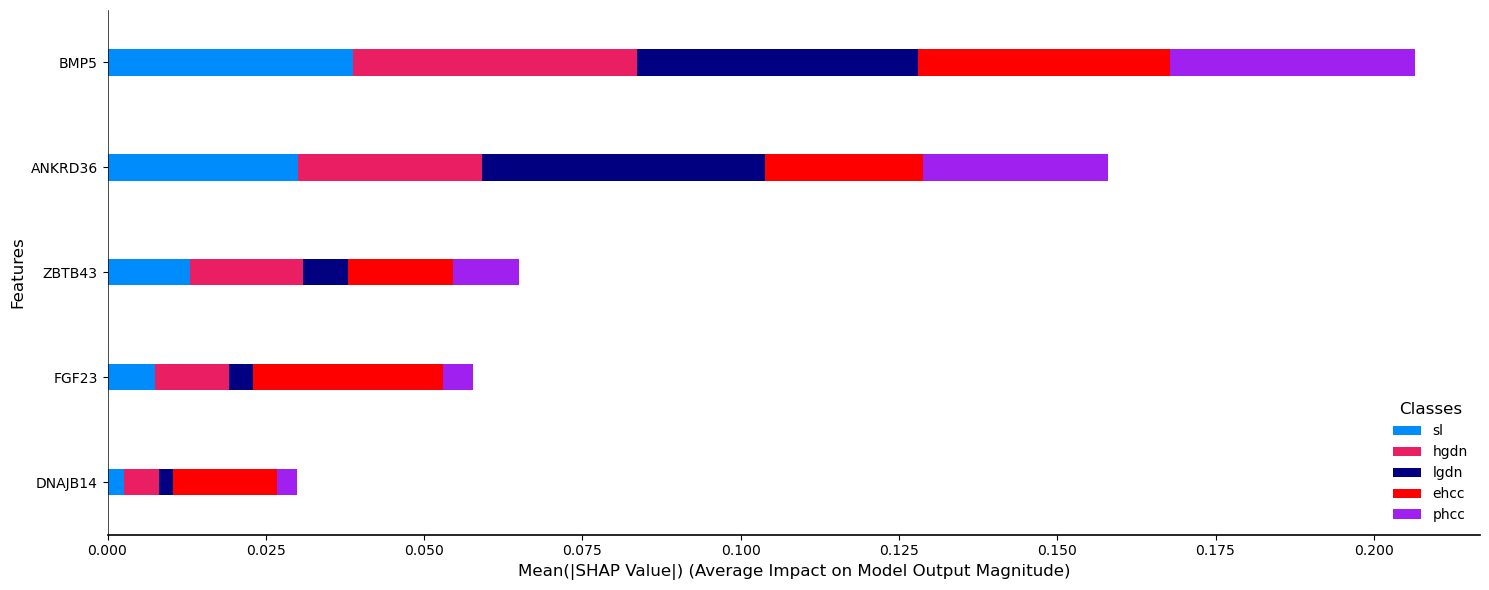

In [51]:
# Creating the plot 👇


figsize = (15, 6)   # Configurable plot size (X, Y)
plt.figure(figsize=figsize)

# Define custom y-positions for the bars
y_positions = [i for i in range(len(sorted_features[::-1]))]
bottom = np.zeros(len(y_positions))

# Plot each class contribution
for i, color in enumerate(colors):
    plt.barh(
        y_positions,  
        mean_shap[i, sorted_idx][::-1],  # here you can flip the 1 or -1 depending on if you want it descending or ascending
        height=0.25,                     # this is the height of the horizontal bars, edit it as you like           
        left=bottom,
        color=color,
        label=labels[i],          
    )
    bottom += mean_shap[i, sorted_idx][::-1]  # Update bottom for stacking
    
# Set custom y-ticks and limits, I've done this to make the graph look a little bit better
plt.yticks(y_positions, sorted_features[::-1], fontsize=10)  
plt.ylim(-0.5, len(sorted_features) - 0.5)  

# Labels and titles
plt.xlabel('Mean(|SHAP Value|) (Average Impact on Model Output Magnitude)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Adding black borders to the bottom and left
ax = plt.gca()
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)  
ax.spines['left'].set_color('black')  
ax.spines['left'].set_linewidth(0.5)  #* In the paper the left bar was a lot lighter

# Move legend to bottom-right corner with custom alignment
plt.legend(
    fontsize=10,
    title="Classes",
    title_fontsize=12,
    loc='lower right',          # Position in bottom-right corner
    bbox_to_anchor=(1, 0),      # Custom anchor point (in order to place this at bottom right corner)
    ncol=1,                     # Vertical layout (making one column only)
    frameon=False               # Remove the frame, as we implemented custom black borders
)

plt.tight_layout()
plt.show()

##### <u> **Feature Contribution Graph** </u>
##### - Highlights the most and least influential features in the model.
##### - Shows impact of each feature on model output
##### - The magnitude of the SHAP values visually indicates the strength of each feature's influence on the prediction.

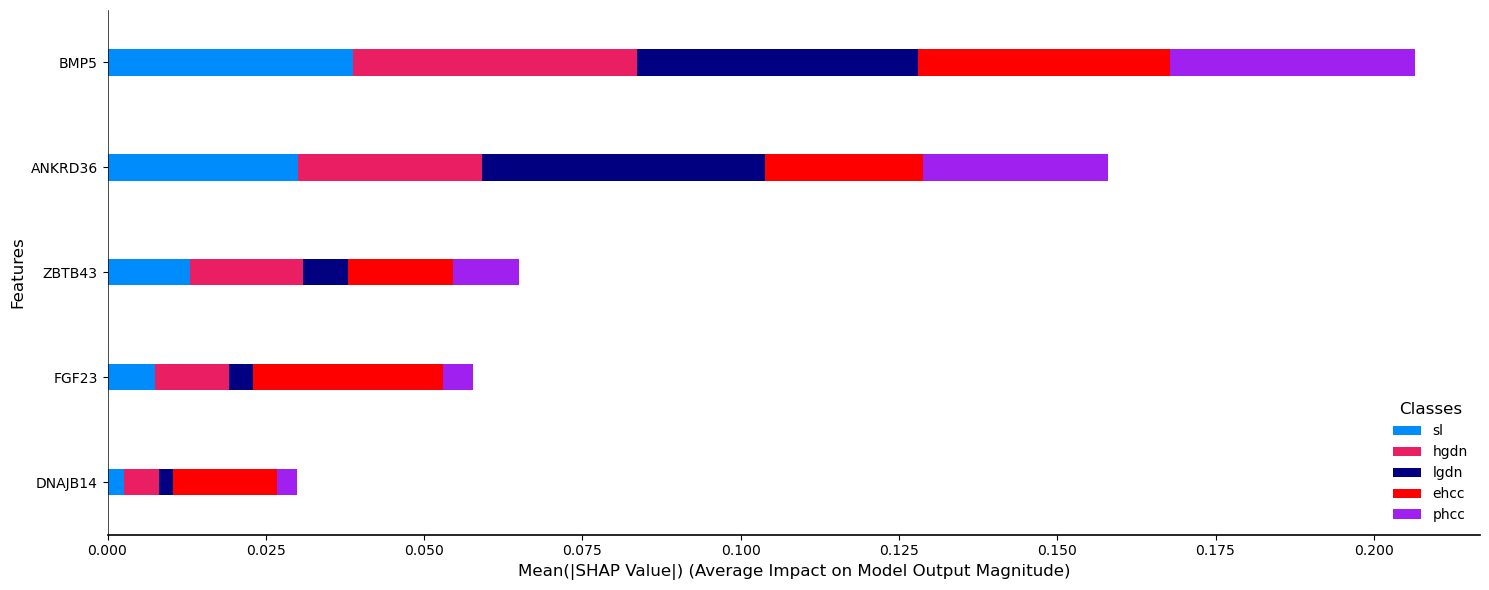

In [54]:
# Creating the plot 👇


figsize = (15, 6)   # Configurable plot size (X, Y)
plt.figure(figsize=figsize)

# Define custom y-positions for the bars
y_positions = [i for i in range(len(sorted_features[::-1]))]
bottom = np.zeros(len(y_positions))

# Plot each class contribution
for i, color in enumerate(colors):
    plt.barh(
        y_positions,  
        mean_shap[i, sorted_idx][::-1],  # here you can flip the 1 or -1 depending on if you want it descending or ascending
        height=0.25,                     # this is the height of the horizontal bars, edit it as you like           
        left=bottom,
        color=color,
        label=labels[i],          
    )
    bottom += mean_shap[i, sorted_idx][::-1]  # Update bottom for stacking
    
# Set custom y-ticks and limits, I've done this to make the graph look a little bit better
plt.yticks(y_positions, sorted_features[::-1], fontsize=10)  
plt.ylim(-0.5, len(sorted_features) - 0.5)  

# Labels and titles
plt.xlabel('Mean(|SHAP Value|) (Average Impact on Model Output Magnitude)', fontsize=12)
plt.ylabel('Features', fontsize=12)

# Adding black borders to the bottom and left
ax = plt.gca()
ax.spines['top'].set_visible(False)  
ax.spines['right'].set_visible(False)

ax.spines['bottom'].set_color('black')
ax.spines['bottom'].set_linewidth(1.2)  
ax.spines['left'].set_color('black')  
ax.spines['left'].set_linewidth(0.5)  #* In the paper the left bar was a lot lighter

# Move legend to bottom-right corner with custom alignment
plt.legend(
    fontsize=10,
    title="Classes",
    title_fontsize=12,
    loc='lower right',          # Position in bottom-right corner
    bbox_to_anchor=(1, 0),      # Custom anchor point (in order to place this at bottom right corner)
    ncol=1,                     # Vertical layout (making one column only)
    frameon=False               # Remove the frame, as we implemented custom black borders
)

plt.tight_layout()
plt.show()

Just for debugging 👇 [Ignore]

In [ ]:
# Print the saved results
for result in saved_results:
    print(f"Instance {result['Instance']}:")
    print(f"SHAP values for the instance (rounded): {result['SHAP Values']}")
    print(f"Corresponding features for the instance: {result['Features']}")
    print("-" * 50)  # Separator for clarity

Instance 1:
SHAP values for the instance (rounded): [ 0.00209  0.0298   0.02593  0.36048 -0.4183 ]
Corresponding features for the instance: [8.42841 6.67642 5.66971 5.1269  7.65715]
--------------------------------------------------
Instance 2:
SHAP values for the instance (rounded): [-0.01056 -0.04259 -0.03418  0.06725  0.02008]
Corresponding features for the instance: [8.73036 7.14994 4.26094 6.49215 8.02028]
--------------------------------------------------
Instance 3:
SHAP values for the instance (rounded): [-0.00989 -0.04882 -0.05491  0.12637 -0.01274]
Corresponding features for the instance: [7.40364 7.69148 4.90987 6.34045 7.73655]
--------------------------------------------------
Instance 4:
SHAP values for the instance (rounded): [-0.00952  0.00052  0.01246 -0.10906  0.1056 ]
Corresponding features for the instance: [ 8.27122  9.94379  7.29802  8.45604 11.6721 ]
--------------------------------------------------
Instance 5:
SHAP values for the instance (rounded): [-0.00368  